<a href="https://colab.research.google.com/github/mayankmnitj/UcConvoNet/blob/main/LF_CNN_on_MD4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# encoding: utf-8
import numpy as np
import re
import pandas as pd
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
#from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
data11 = pd.read_excel(r'/content/drive/MyDrive/Ph.D/BuzzFeed.xlsx', header=0)
#data12 = pd.read_excel(r'/content/drive/MyDrive/PHD/PolitiFact.xlsx', header=0)
data13 = pd.read_csv(r'/content/drive/MyDrive/Ph.D/Mcintire_DataSet.csv', header=0)
data14 = pd.read_csv(r'/content/drive/MyDrive/Ph.D/Reuter_dataset.csv', header=0)
data15 = pd.read_csv(r'/content/drive/MyDrive/Ph.D/Kaggle.csv', header=0)


In [ ]:
data11=data11[['text','label']]
data13=data13[['text','label']]
data14=data14[['text','label']]
data15=data15[['text','label']]
data15=data15[['text','label']].dropna()

In [ ]:
frames1 = [data11, data13, data14, data15]
data10 = pd.concat(frames1, axis=0)
print(data10.shape)

(72176, 2)


In [ ]:
data1 = data10['text'].values
y= data10['label'].values
print(data1)
print(y)

['I woke up this morning to find a variation of this headline splashed all over my news feed:\n\nBill Clinton: ‘Natural’ For Foundation Donors to Seek Favors\n\nHere’s Google:\n\nNaturally, my reaction was “oh, s**t, what did Bill Clinton do to damage his wife’s campaign now?”\n\nOf course, the headline sounds really, really awful. It plays right into the idea that the Clinton Foundation is all about pay to play, just like Donald Trump has been saying all along. Unfortunately, it takes reading beyond the headlines, which is something most people don’t do, to find out the real story – and the real story is that there is no pay to play.\n\n“It was natural for people who’ve been our political allies and personal friends to call and ask for things. And I trusted the State Department wouldn’t do anything they shouldn’t do,” Clinton told NPR in an interview that aired Monday morning. Source: CNN\n\nIn other words, people can ask for favors, but that certainly doesn’t mean they’ll get them. L

In [ ]:
data1.shape

(72176,)

In [ ]:
from gensim.models import word2vec
# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in data1]

In [ ]:
len(tokenized_corpus)

72176

In [ ]:
# Set values for various parameters
feature_size = 100   # Word vector dimensionality
window_context = 5         # Context window size
min_word_count = 1   # Minimum word count
sample = 1e-3   # Downsample setting for frequent words

#create CBOW model
w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size,
                          window=window_context, min_count=min_word_count,
                          sample=sample, epochs=5)
# create Skip gram model only sg=1 add
'''w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size,
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=5)'''

'w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size,\n                          window=window_context, min_count=min_word_count,\n                          sample=sample, iter=5)'

In [ ]:
len(w2v_model.wv.index_to_key)

293124

In [ ]:
w2v_model.syn1neg

array([[-0.08954263,  0.31170255,  0.3332162 , ..., -0.02379763,
         0.38030428, -0.66401017],
       [ 0.0576994 ,  0.00374049,  0.19198412, ...,  0.0975897 ,
         0.16842942, -0.22099216],
       [ 0.13462551,  0.13762575,  0.31190982, ..., -0.01254657,
         0.35051718, -0.32615164],
       ...,
       [ 0.03176749,  0.0611322 ,  0.03572684, ...,  0.03872047,
         0.11873107, -0.16746354],
       [ 0.05160113,  0.09418864,  0.04397171, ...,  0.02710115,
         0.07313387, -0.13415907],
       [ 0.05031064,  0.00147708,  0.08329948, ...,  0.11222675,
         0.10126322, -0.15226023]], dtype=float32)

In [ ]:
# visualize embeddings
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]
'''
tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')'''


def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1
            #feature_vector += model[word].reshape((1, vector_size))
            feature_vector = np.add(feature_vector, model.wv.get_vector(word))

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
doc_em= pd.DataFrame(w2v_feature_array)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data11 = pd.read_excel(r'/content/drive/MyDrive/Ph.D/arrays_Buzz_new.xlsx', header=0)
#data12 = pd.read_excel(r'/content/drive/MyDrive/Ph.D/arrays_politi_new.xlsx', header=0)
data13 = pd.read_excel(r'/content/drive/MyDrive/Ph.D/arrays_Mcintire.xlsx', header=0)
data14 = pd.read_excel(r'/content/drive/MyDrive/Ph.D/arrays_Reuter.xlsx', header=0)
data15 = pd.read_excel(r'/content/drive/MyDrive/Ph.D/arrays_kaggle.xlsx', header=0)

In [ ]:
frames1 = [data11, data13, data14, data15]
data10 = pd.concat(frames1, axis=0)
print(data10.shape)

(72176, 81)


In [ ]:
data10.to_excel('/content/drive/MyDrive/Ph.D/MD4_LF.xlsx', index=False)

In [ ]:
data16 = pd.read_excel(r'/content/drive/MyDrive/Ph.D/MD4_LF.xlsx', header=0)

In [ ]:
data16=data16.iloc[:,:-1]
data16.shape

(72176, 80)

In [ ]:
doc_em

In [ ]:
frames = [data16, doc_em]
data2 = pd.concat(frames, axis=1)
print(data2.shape)
print(y.shape)

(72176, 180)
(72176,)


In [ ]:
data2=data2.values
print(data2)

[[ 3.59000000e+02  3.77268280e-02  4.60331791e-01 ...  4.62728795e-01
   8.40850322e-01 -9.20835167e-02]
 [ 1.09000000e+02  1.32359307e-01  3.36038961e-01 ...  3.34409905e-01
   7.03075999e-01 -1.40980034e-01]
 [ 9.40000000e+01  1.46587879e-01  4.40000866e-01 ...  6.29877807e-01
   6.95078370e-01 -2.74884216e-01]
 ...
 [ 3.40000000e+02  1.12539683e-01  4.66388889e-01 ... -4.62819170e-02
   7.00511503e-01 -1.25794881e-02]
 [ 8.60000000e+01 -1.94264069e-02  2.09632035e-01 ...  1.13662787e-01
   5.39154262e-01  2.06284169e-01]
 [ 3.93000000e+02  7.74866912e-02  4.49642711e-01 ...  7.83737979e-02
   4.49005698e-01  2.02540096e-01]]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(data2, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [ ]:
print(features_train)
print(len(features_train[0]))
print(labels_train)

[[-0.231156    0.20144435 -0.42229976 ... -2.31688778 -0.14145073
   0.12682389]
 [ 0.07766529 -0.12619475 -0.25814658 ...  0.19518183  0.8984152
  -0.11292195]
 [-0.20828035  0.4839272   0.38524999 ...  1.15589054  0.07884851
  -0.40026544]
 ...
 [-0.07483905 -1.10294414 -1.31635474 ... -0.40273446 -1.26808285
  -1.13037334]
 [-0.33409643 -1.01693861  0.10625223 ... -0.05126895  0.80546621
  -0.89416636]
 [ 0.69149527  1.00252744  0.65029413 ... -0.11846189 -0.11176776
   0.47683357]]
180
[0 0 1 ... 0 0 0]


In [ ]:
features_train.shape

(57740, 180)

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
print(features_train.shape)
print(labels_train.shape)

# convert the features and labels to the tensor
features_train = tf.convert_to_tensor(features_train)
features_train = tf.reshape(features_train, (57740, 180, 1))
print(features_train.shape)
print(labels_train)

# convert the labels train to categorical values
labels_train = tf.keras.utils.to_categorical(labels_train)
print(labels_train)

(57740, 180)
(57740,)
(57740, 180, 1)
[0 0 1 ... 0 0 0]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# # Variables
INPUT_SHAPE = (180,1)
# print(INPUT_SHAPE)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = 5
POOL_SHAPE = 2
FULLY_CONNECT_NUM = 128
NUM_CLASSES = 2
# Model architecture implementation
model = Sequential()
model.add(Conv1D(filters = FILTER1_SIZE, kernel_size = FILTER_SHAPE, activation='relu', input_shape = INPUT_SHAPE))
model.add(MaxPooling1D(POOL_SHAPE))
model.add(Dropout(rate=0.010))
model.add(Conv1D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling1D(POOL_SHAPE))
model.add(Dropout(rate=0.010))
model.add(Conv1D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling1D(POOL_SHAPE))
model.add(Dropout(rate=0.010))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 176, 32)           192       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 88, 32)            0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 88, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 84, 64)            10304     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 42, 64)            0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 42, 64)           

In [ ]:
 model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(),#from_logits=True
                metrics=['accuracy'])

In [ ]:
history = model.fit(features_train, labels_train, validation_split=0.2, epochs=10, batch_size=50)

Epoch 1/10
924/924 [==============================] - 35s 38ms/step - loss: 0.0548 - accuracy: 0.9795 - val_loss: 0.0846 - val_accuracy: 0.9690
Epoch 2/10
924/924 [==============================] - 32s 35ms/step - loss: 0.0410 - accuracy: 0.9850 - val_loss: 0.0954 - val_accuracy: 0.9693
Epoch 3/10
924/924 [==============================] - 31s 33ms/step - loss: 0.0390 - accuracy: 0.9851 - val_loss: 0.0915 - val_accuracy: 0.9706
Epoch 4/10
924/924 [==============================] - 30s 33ms/step - loss: 0.0295 - accuracy: 0.9895 - val_loss: 0.0991 - val_accuracy: 0.9700
Epoch 5/10
924/924 [==============================] - 32s 34ms/step - loss: 0.0267 - accuracy: 0.9899 - val_loss: 0.1095 - val_accuracy: 0.9700
Epoch 6/10
924/924 [==============================] - 32s 34ms/step - loss: 0.0259 - accuracy: 0.9903 - val_loss: 0.1310 - val_accuracy: 0.9666
Epoch 7/10
924/924 [==============================] - 31s 34ms/step - loss: 0.0221 - accuracy: 0.9924 - val_loss: 0.1131 - val_accuracy:

In [ ]:
with open('/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
with open('/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)

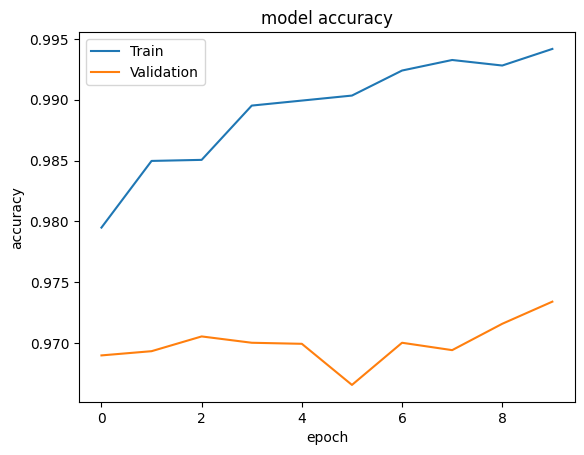

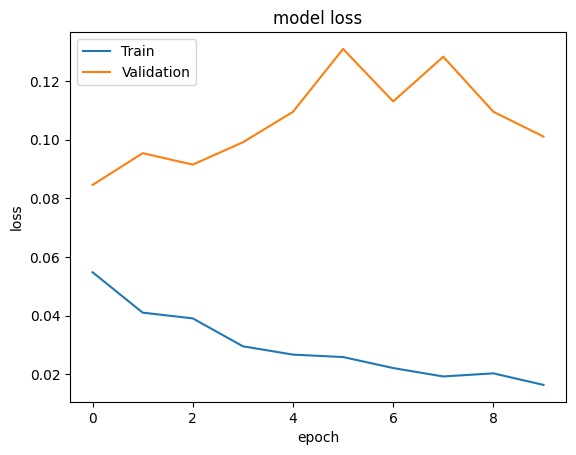

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
features_test.shape

TensorShape([14436, 180, 1])

In [ ]:
# use the sklearn to find the precision and recall
# its your work to find out.
# convert the features and labels to the tensor
print(features_test.shape)
features_test = tf.convert_to_tensor(features_test)
features_test = tf.reshape(features_test, (14436, 180, 1))
print(features_test.shape)

(14436, 180, 1)
(14436, 180, 1)


In [ ]:
y_pred = model.predict(features_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

452/452 [==============================] - 3s 6ms/step
[0 0 1 ... 0 0 1]


In [ ]:
from sklearn import metrics

print(" model accuracy(in %):", metrics.accuracy_score(labels_test,y_pred) * 100)

#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test,predictions_test1)
#print(cm)
from sklearn.metrics import classification_report
print(classification_report(labels_test,y_pred))

 model accuracy(in %): 97.41618176780271
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7020
           1       0.98      0.97      0.97      7416

    accuracy                           0.97     14436
   macro avg       0.97      0.97      0.97     14436
weighted avg       0.97      0.97      0.97     14436



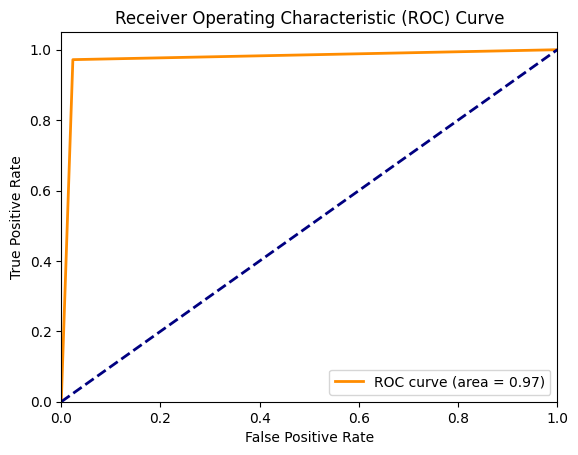

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(labels_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(labels_test,y_pred), annot=True, fmt='d')